<a href="https://colab.research.google.com/github/satuelisa/NLPF/blob/main/comp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [176]:
import numpy as np

ss = 10000
d1 = np.random.poisson(lam = 30.32, size = ss) + np.round(5 * np.random.normal(size = ss))
d2 = np.random.poisson(lam = 24.36, size = ss)
d2r = np.random.poisson(lam = 24.34, size = ss)
d1[:10]

array([25., 39., 26., 23., 26., 34., 20., 38., 22., 31.])

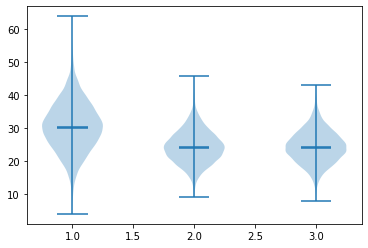

In [177]:
import matplotlib.pyplot as plt
pos = [1, 2, 3] # d1 and d2, d2r
fig = plt.violinplot([d1, d2, d2r], pos,
                     showmeans = True, 
                     showextrema = True, 
                     showmedians = True)


In [178]:
import pandas as pd
pct = pd.DataFrame()
pct['d1'] = np.percentile(d1, range(100))
pct['d2'] = np.percentile(d2, range(100))
pct['d2r'] = np.percentile(d2r, range(100))
pct['quantile'] = range(100)
pct.head()
print(pct.loc[pct['quantile'] == 50])
pct.tail()
print(sum(d1) / ss)
print(np.mean(d1))
print(sum(d2) / ss)
print(np.mean(d2))

      d1    d2   d2r  quantile
50  30.0  24.0  24.0        50
30.4863
30.4863
24.3329
24.3329


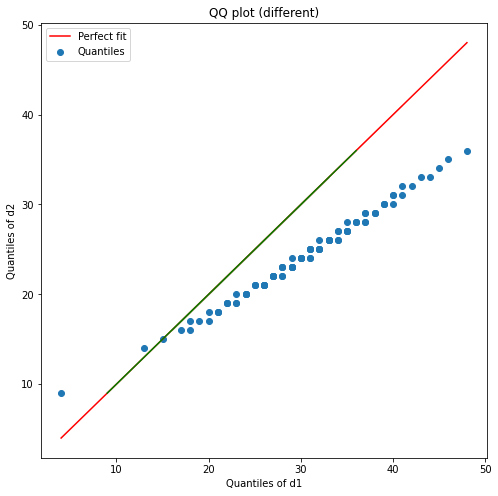

In [179]:
import seaborn as sns
plt.figure(figsize=(8, 8))
plt.scatter(x = 'd1', y = 'd2', data = pct, label='Quantiles');
sns.lineplot(x = 'd1', y = 'd1', data = pct, color='r', label='Perfect fit');
sns.lineplot(x = 'd2', y = 'd2', data = pct, color='g');
plt.xlabel('Quantiles of d1')
plt.ylabel('Quantiles of d2')
plt.legend()
plt.title("QQ plot (different)");

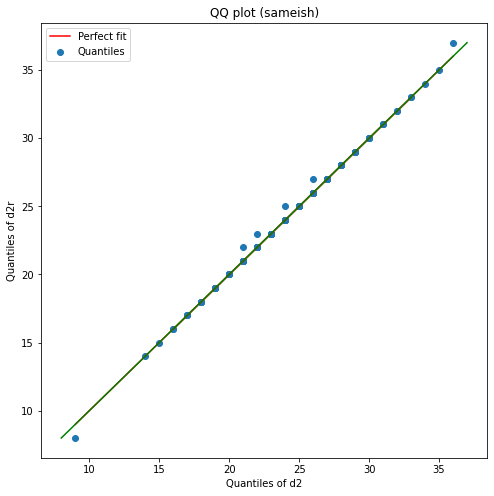

In [180]:
plt.figure(figsize=(8, 8))
plt.scatter(x = 'd2', y = 'd2r', data = pct, label='Quantiles');
sns.lineplot(x = 'd2', y = 'd2', data = pct, color='r', label='Perfect fit');
sns.lineplot(x = 'd2r', y = 'd2r', data = pct, color='g');
plt.xlabel('Quantiles of d2')
plt.ylabel('Quantiles of d2r')
plt.legend()
plt.title("QQ plot (sameish)");

In [182]:
df_bins = pd.DataFrame()
_, bins = pd.qcut(d1, q = 5, retbins = True)
df_bins['bin'] = pd.cut(d1, bins = bins).value_counts().index
df_bins['d1_observed'] = pd.cut(d1, bins = bins).value_counts().values
df_bins['d2_observed'] = pd.cut(d2, bins = bins).value_counts().values
df_bins['d2_expected'] = df_bins['d1_observed'] / np.sum(df_bins['d1_observed']) * np.sum(df_bins['d2_observed'])

print(sum(df_bins['d2_observed']))
print(sum(df_bins['d2_expected']))
df_bins

10000
10000.0


,bin,d1_observed,d2_observed,d2_expected
0,"(4.0, 24.0]",2113,5286,2113.211321
1,"(24.0, 29.0]",2394,3249,2394.239424
2,"(29.0, 32.0]",1620,918,1620.162016
3,"(32.0, 37.0]",2156,480,2156.215622
4,"(37.0, 64.0]",1716,67,1716.171617


In [183]:
from scipy.stats import chisquare

stat, p_value = chisquare(df_bins['d2_observed'], df_bins['d2_expected'])
print(f"Chi-squared Test: statistic = {stat:.4f}, p-value = {p_value:.4f}")

Chi-squared Test: statistic = 8260.9672, p-value = 0.0000


In [184]:
df_bins = pd.DataFrame()
_, bins = pd.qcut(d2, q = 5, retbins = True)
df_bins['bin'] = pd.cut(d1, bins = bins).value_counts().index
df_bins['d2_observed'] = pd.cut(d2, bins = bins).value_counts().values
df_bins['d2r_observed'] = pd.cut(d2r, bins = bins).value_counts().values
df_bins['d2r_expected'] = df_bins['d2_observed'] / np.sum(df_bins['d2_observed']) * np.sum(df_bins['d2r_observed'])

print(sum(df_bins['d2r_observed']))
print(sum(df_bins['d2r_expected']))
stat, p_value = chisquare(df_bins['d2r_observed'], df_bins['d2r_expected'])
print(f"Chi-squared Test: statistic = {stat:.4f}, p-value = {p_value:.4f}")
df_bins

9996
9996.0
Chi-squared Test: statistic = 3.6273, p-value = 0.4588


,bin,d2_observed,d2r_observed,d2r_expected
0,"(9.0, 20.0]",2193,2181,2192.780634
1,"(20.0, 23.0]",2251,2217,2250.774832
2,"(23.0, 25.0]",1651,1610,1650.834850
3,"(25.0, 28.0]",1971,2003,1970.802841
4,"(28.0, 46.0]",1931,1985,1930.806842


In [185]:
from scipy.stats import mannwhitneyu

stat, p_value = mannwhitneyu(d1, d2)
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

stat, p_value = mannwhitneyu(d2, d2r)
print(f" Mann–Whitney U Test: statistic={stat:.4f}, p-value={p_value:.4f}")

 Mann–Whitney U Test: statistic=75565933.5000, p-value=0.0000
 Mann–Whitney U Test: statistic=49518334.5000, p-value=0.2372
